In [79]:
import datetime
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Data Splitting
from sklearn.model_selection import train_test_split

# Data Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Data Modeling
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Data Metrics
from sklearn import metrics

# Data Modeling
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import joblib
import keras
from keras.layers import Dense
from keras.models import load_model

### import data 

In [46]:
t_data = pd.read_csv("data.csv")
t_data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


##### shape before preprocessing

In [47]:
t_data.shape

(14999, 9)

##### statistical features of data

In [48]:
t_data.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


##### Removing videos with adview greater than 2000000 as outliers :

In [49]:
t_data = t_data[t_data['adview'] < 2000000]
     

##### assinging categories to number in categories feature

In [50]:
category  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, "F" : 6,  'G' : 7, 'H' : 8}
t_data['category'] = t_data['category'].map(category)
t_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


##### there are many F letter in the data so we have to remove those F letter 

In [51]:
t_data  = t_data[t_data.views != 'F']
t_data  = t_data[t_data.likes != 'F']
t_data  = t_data[t_data.dislikes  != 'F']
t_data  = t_data[t_data.comment  != 'F']
t_data.shape

(14636, 9)

##### Converting values to integers for views, likes, comments, dislkes and adview :

In [52]:
t_data['views'] = pd.to_numeric(t_data['views'])
t_data['likes'] = pd.to_numeric(t_data['likes'])
t_data['dislikes'] = pd.to_numeric(t_data['dislikes'])
t_data['comment'] = pd.to_numeric(t_data['comment'])
t_data['adview'] = pd.to_numeric(t_data['adview'])
t_data.shape

(14636, 9)

##### Extracting the 'vidid' column from train_data and storing in "video" column :

In [53]:
video_column = t_data['vidid']
video_column

0        VID_18655
1        VID_14135
2         VID_2187
3        VID_23096
4        VID_10175
           ...    
14994       VID_31
14995     VID_5861
14996      VID_805
14997    VID_19843
14998     VID_8534
Name: vidid, Length: 14636, dtype: object

##### Encoding features like 'published', 'duration' and 'vidid' :

In [54]:
t_data['duration'] = LabelEncoder().fit_transform(t_data['duration'])
t_data['published'] = LabelEncoder().fit_transform(t_data['published'])
t_data['vidid'] = LabelEncoder().fit_transform(t_data['vidid'])
t_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


##### Defining a function to convert time to seconds under 'duration' column :

In [81]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H', 'M', 'S']
  for i in y:
    if i not in P:
      mm += i
    else:
      if i == 'H':
        h = mm
        mm = ''
      elif i == 'M':
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  
  if h == '':
    h = '00'
  if m == '':
    m = '00'
  if s == '':
    s = '00'
  bp = h + ':' + m + ':' + s 
  return bp
  train = pd.read_csv('data.csv')
  mp = pd.read_csv(path)['duration']
  time = mp.apply(checki)

  def func_sec(time_string):
      h, m, s = time_string.split(':')
  return (int)(h) * 3600 + (int)(m) * 60 + (int)(s)

  time1 = time.apply(func_sec)

  t_data['duration'] = time1
  
t_data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,2925,6
1,1707,56,2,6,2185,3040,4
2,2023,25,0,2,2094,1863,3
3,620860,777,161,153,2119,2546,8
4,666,1,0,0,2091,1963,4


##### Visualization of Individual Plots 

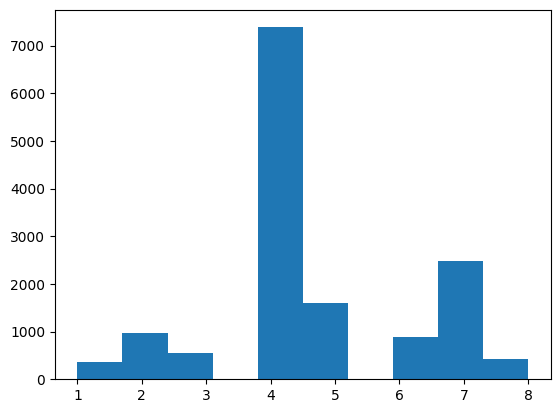

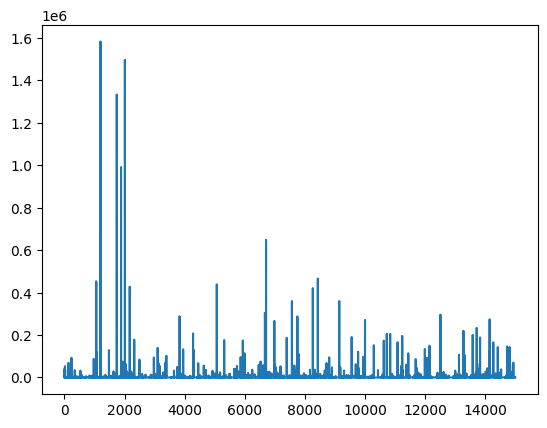

In [57]:
plt.hist(t_data['category'])
plt.show()
plt.plot(t_data['adview'])
plt.show()


##### Removing videos with adview greater than 2000000 as outliers :

In [58]:
t_data = t_data[t_data['adview'] < 2000000]
t_data.shape

(14636, 9)

##### Visualizng in HeatMap

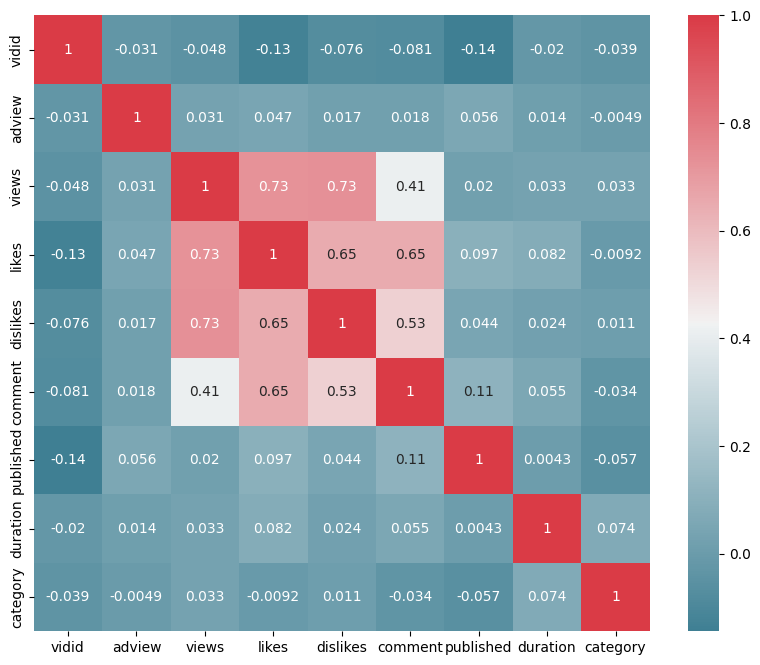

In [59]:
f, ax = plt.subplots(figsize = (10,8))
corr = t_data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax, annot = True)
plt.show()

##### Splitting Data :

In [60]:
Y_train = pd.DataFrame(data = t_data.iloc[:,1].values, columns = ['target'])
t_data = t_data.drop(['adview'], axis = 1)
t_data = t_data.drop(['vidid'], axis = 1)
t_data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,2925,6
1,1707,56,2,6,2185,3040,4
2,2023,25,0,2,2094,1863,3
3,620860,777,161,153,2119,2546,8
4,666,1,0,0,2091,1963,4


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(t_data, Y_train, test_size = 0.2, random_state = 42) 

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
      

(11708, 7)
(2928, 7)
(11708, 1)
(2928, 1)


##### normalizing data

In [62]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train.mean())
print(X_test.mean())

0.25618694991317975
0.257362809237383


##### Evaluation Metrics :

In [63]:
def print_error(X_test, Y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, prediction))
    print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, prediction))
    print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))
    
  
     


##### Linear Regression :

In [64]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, Y_train)
print_error(X_test, Y_test, linear_regression)

Mean Absolute Error :  3718.9740619231143
Mean Squared Error :  835886630.8152658
Root Mean Squared Error :  28911.70404551184


##### Support Vector Regressor(SVR) :

In [65]:
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, Y_train)
print_error(X_test, Y_test, supportvector_regressor)

C:\Users\arpit\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error :  1696.9654361489104
Mean Squared Error :  833686308.880427
Root Mean Squared Error :  28873.626528034663


##### Decision Tree Regressor :

In [66]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
print_error(X_test, Y_test, decision_tree)
     

Mean Absolute Error :  2353.053961748634
Mean Squared Error :  758822532.6079235
Root Mean Squared Error :  27546.733610501327


##### Random Forest Regressor :

In [67]:
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
random_forest.fit(X_train, Y_train)
print_error(X_test, Y_test, random_forest)

C:\Users\arpit\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error :  3467.428999455954
Mean Squared Error :  626953583.8945947
Root Mean Squared Error :  25039.041193595946


##### Creating Artificial Neural Network :

In [68]:

ann = keras.models.Sequential([Dense(6, activation = 'relu', input_shape = X_train.shape[1:]), Dense(6, activation = 'relu'), Dense(1)])
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer = optimizer, loss = loss, metrics = ['mean_squared_error'])
history = ann.fit(X_train, Y_train, epochs = 100)
ann.summary()
print_error(X_test, Y_test, ann)

Epoch 1/100


C:\Users\arpit\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 610567104.0000 - mean_squared_error: 610563008.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 253485328.0000 - mean_squared_error: 253485408.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 645643200.0000 - mean_squared_error: 645644672.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 915329600.0000 - mean_squared_error: 915330944.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 914804096.0000 - mean_squared_error: 914805504.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 645679488.0000 - mean_squared_error: 645680832.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1199583360.0000 - mean_squared_error: 1199584768.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 680286208.0000 - mean_squared_error: 680287680.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 481110688.0000 - mean_squared_error: 48110915

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense_3 (Dense)               │ (None, 6)             │           48 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_4 (Dense)               │ (None, 6)             │           42 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_5 (Dense)               │ (None, 1)             │            7 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Error :  3302.7458246991932
Mean Squared Error :  829580026.3365885
Root Mean Squared Error :  28802.43091019556


In [71]:

#Saving Scikitlearn models :
joblib.dump(supportvector_regressor, 'SVR_youtubeadview.pkl')
#Saving Keras Artificial Neural Network Model :
ann.save('ann_youtubeadview.h5')

#### TESTING

In [72]:
test_data = pd.read_csv('test.csv')
     

test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B



##### Removing character 'F' present in the data :

In [73]:
test_data = test_data[test_data.views != 'F']
test_data = test_data[test_data.likes != 'F']
test_data = test_data[test_data.dislikes != 'F']
test_data = test_data[test_data.comment != 'F']

test_data.shape
     

(8549, 8)


##### Assigning each category to a number for 'category' feature :

In [74]:
category = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'H' : 8}
test_data['category'] = test_data['category'].map(category)

test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2



##### Converting values to integers for views, likes, comments, dislkes and adview :

In [75]:

test_data['views'] = pd.to_numeric(test_data['views'])
test_data['likes'] = pd.to_numeric(test_data['likes'])
test_data['dislikes'] = pd.to_numeric(test_data['dislikes'])
test_data['comment'] = pd.to_numeric(test_data['comment'])



##### Extracting the 'vidid' column from test_data and storing in vidid_column :

In [76]:

vidid_column = test_data['vidid']
vidid_column

0        VID_1054
1       VID_18629
2       VID_13967
3       VID_19442
4         VID_770
          ...    
8759     VID_2944
8760     VID_8195
8761    VID_18973
8762     VID_5849
8763     VID_8494
Name: vidid, Length: 8549, dtype: object


##### Encoding features like 'duration', 'vidid' and 'published' :

In [77]:

test_data['duration'] = LabelEncoder().fit_transform(test_data['duration'])
test_data['vidid'] = LabelEncoder().fit_transform(test_data['vidid'])
test_data['published'] = LabelEncoder().fit_transform(test_data['published'])

test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


##### Converting time to seconds under 'duration' column :

In [85]:


test = pd.read_csv('test.csv')
mp = pd.read_csv('test.csv')['duration']
time = mp.apply(checki)
def func_sec(time_string):
      h, m, s = time_string.split(':')
      return (int)(h) * 3600 + (int)(m) * 60 + (int)(s)
time1 = time.apply(func_sec)

test_data['duration'] = time1
test_data.head()
     

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [86]:
test_data = test_data.drop(['vidid'], axis = 1)
test_data.head()
     

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


##### Normalising Data :

In [87]:

scaler = MinMaxScaler()
X_test = test_data
X_test = scaler.fit_transform(X_test)
     


##### Model selection : Support Vector Regressor Model since this model gave the least Mean Absolute Error

In [88]:
model = supportvector_regressor
     




#### #Performing Prediction on test data :

In [89]:
prediction = model.predict(X_test)

##### Converting the prediction into a Dataframe ::

In [90]:
 
prediction = pd.DataFrame(prediction)
prediction.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB



##### Renaming the column to 'adview' :

In [93]:
prediction = prediction.rename(columns = {0 : 'adview'})
prediction.head()
     

,adview
0,2.296896
1,2.602351
2,2.036048
3,1.641774
4,2.141401


In [92]:
#Saving the prediction Dataframe in a new .csv FIle -> 'prediction.csv' :
prediction.to_csv('PredictedAdview.csv')